## Decision Tree

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


In [26]:
# Load the data from CSV file
df = pd.read_csv("upsampled_bankruptcy.csv")
# df.head()


### We will split the data into two different groups. The first dataframe will contain all 95 variables while the second dataframe will contain the top 10 variables with the highest correlation to bankruptcy. 

In [27]:

X_upsample = df.drop("Bankrupt?", axis=1)
y_upsample = df["Bankrupt?"]

X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2,random_state=42)
y_upsample.value_counts()



0    6599
1    6599
Name: Bankrupt?, dtype: int64

### The cell below gives us the dataframe containing the top 10 variables with the highes correlation to bankruptcy

In [28]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy

corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df[top_corr_features]
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df["Bankrupt?"]
X_train_top10_upsample, X_test_top10_upsample, y_train_top10_upsample, y_test_top10_upsample = train_test_split(X_top10_upsample, y_top10_upsample, test_size=0.2,random_state=42)

### Building a Decision Tree Model For All Variables

This code trains a decision tree classifier model dectree with a maximum depth of 2 on the training data X_train_upsample and y_train_upsample.

After training, the model is visualized as a tree using the plot_tree function from sklearn.tree. The plot_tree function generates a tree diagram that shows the decision-making process of the decision tree model.

The filled=True argument fills the tree nodes with colors to indicate the class distribution, while the rounded=True argument makes the edges of the boxes around the nodes rounded.

The feature_names argument specifies the names of the input features or predictors, which are columns in the DataFrame X.

The class_names argument specifies the names of the target classes or outputs, which in this case are "Not Bankrupt" and "Bankrupt".

The resulting tree diagram can be used to interpret how the model makes predictions for new data based on the values of the input features.

[Text(0.5, 0.8333333333333334, ' Continuous interest rate (after tax) <= 0.782\ngini = 0.5\nsamples = 10558\nvalue = [5271, 5287]\nclass = Bankrupt'),
 Text(0.25, 0.5, ' Total debt/Total net worth <= 0.01\ngini = 0.334\nsamples = 5717\nvalue = [1212, 4505]\nclass = Bankrupt'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 1616\nvalue = [852, 764]\nclass = Not Bankrupt'),
 Text(0.375, 0.16666666666666666, 'gini = 0.16\nsamples = 4101\nvalue = [360, 3741]\nclass = Bankrupt'),
 Text(0.75, 0.5, ' Interest Expense Ratio <= 0.632\ngini = 0.271\nsamples = 4841\nvalue = [4059, 782]\nclass = Not Bankrupt'),
 Text(0.625, 0.16666666666666666, 'gini = 0.06\nsamples = 3536\nvalue = [3427, 109]\nclass = Not Bankrupt'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 1305\nvalue = [632, 673]\nclass = Bankrupt')]

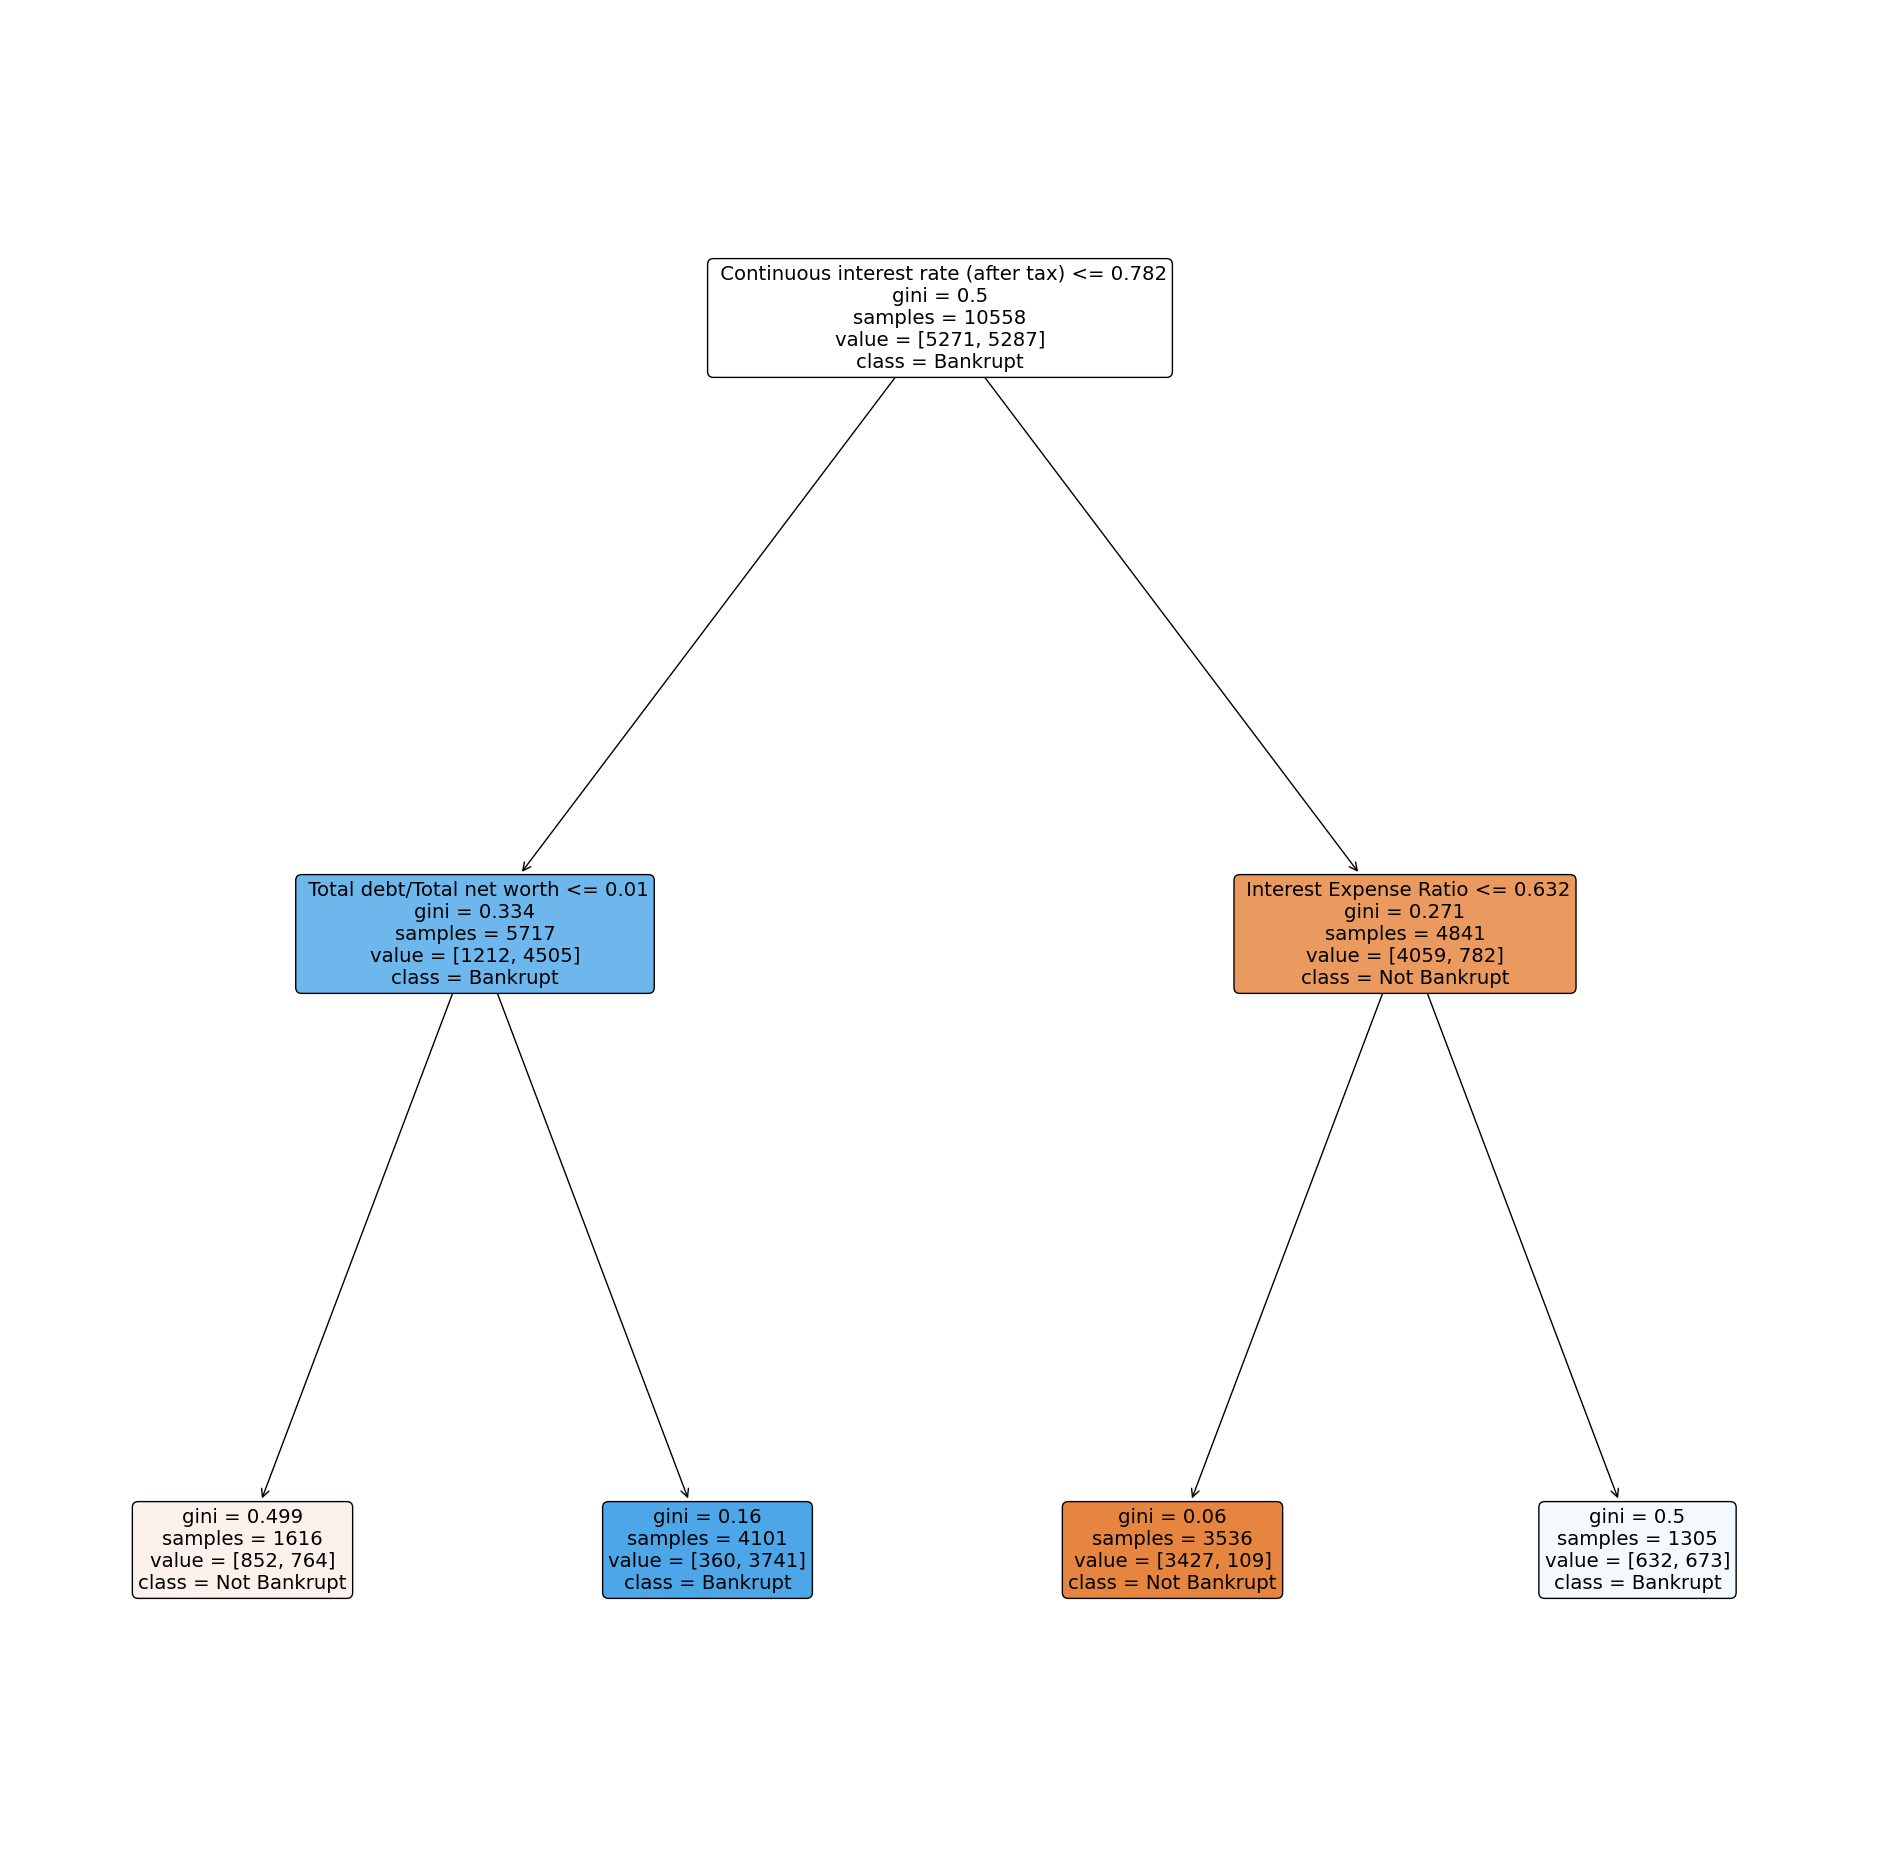

In [29]:
dectree_upsample = DecisionTreeClassifier(max_depth=2)
dectree_upsample.fit(X_train_upsample, y_train_upsample)

f = plt.figure(figsize=(24,24))
plot_tree(dectree_upsample, filled=True, rounded=True, 
          feature_names=X_upsample.columns, 
          class_names=["Not Bankrupt","Bankrupt"])

### Building a Decision Tree Model For Top 10 Variables


[Text(0.5, 0.8333333333333334, ' Persistent EPS in the Last Four Seasons <= 0.213\ngini = 0.5\nsamples = 10558\nvalue = [5271, 5287]\nclass = Bankrupt'),
 Text(0.25, 0.5, ' Net worth/Assets <= 0.853\ngini = 0.31\nsamples = 5327\nvalue = [1020, 4307]\nclass = Bankrupt'),
 Text(0.125, 0.16666666666666666, 'gini = 0.159\nsamples = 4016\nvalue = [350, 3666]\nclass = Bankrupt'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 1311\nvalue = [670, 641]\nclass = Not Bankrupt'),
 Text(0.75, 0.5, ' Debt ratio % <= 0.173\ngini = 0.304\nsamples = 5231\nvalue = [4251, 980]\nclass = Not Bankrupt'),
 Text(0.625, 0.16666666666666666, 'gini = 0.176\nsamples = 4223\nvalue = [3811, 412]\nclass = Not Bankrupt'),
 Text(0.875, 0.16666666666666666, 'gini = 0.492\nsamples = 1008\nvalue = [440, 568]\nclass = Bankrupt')]

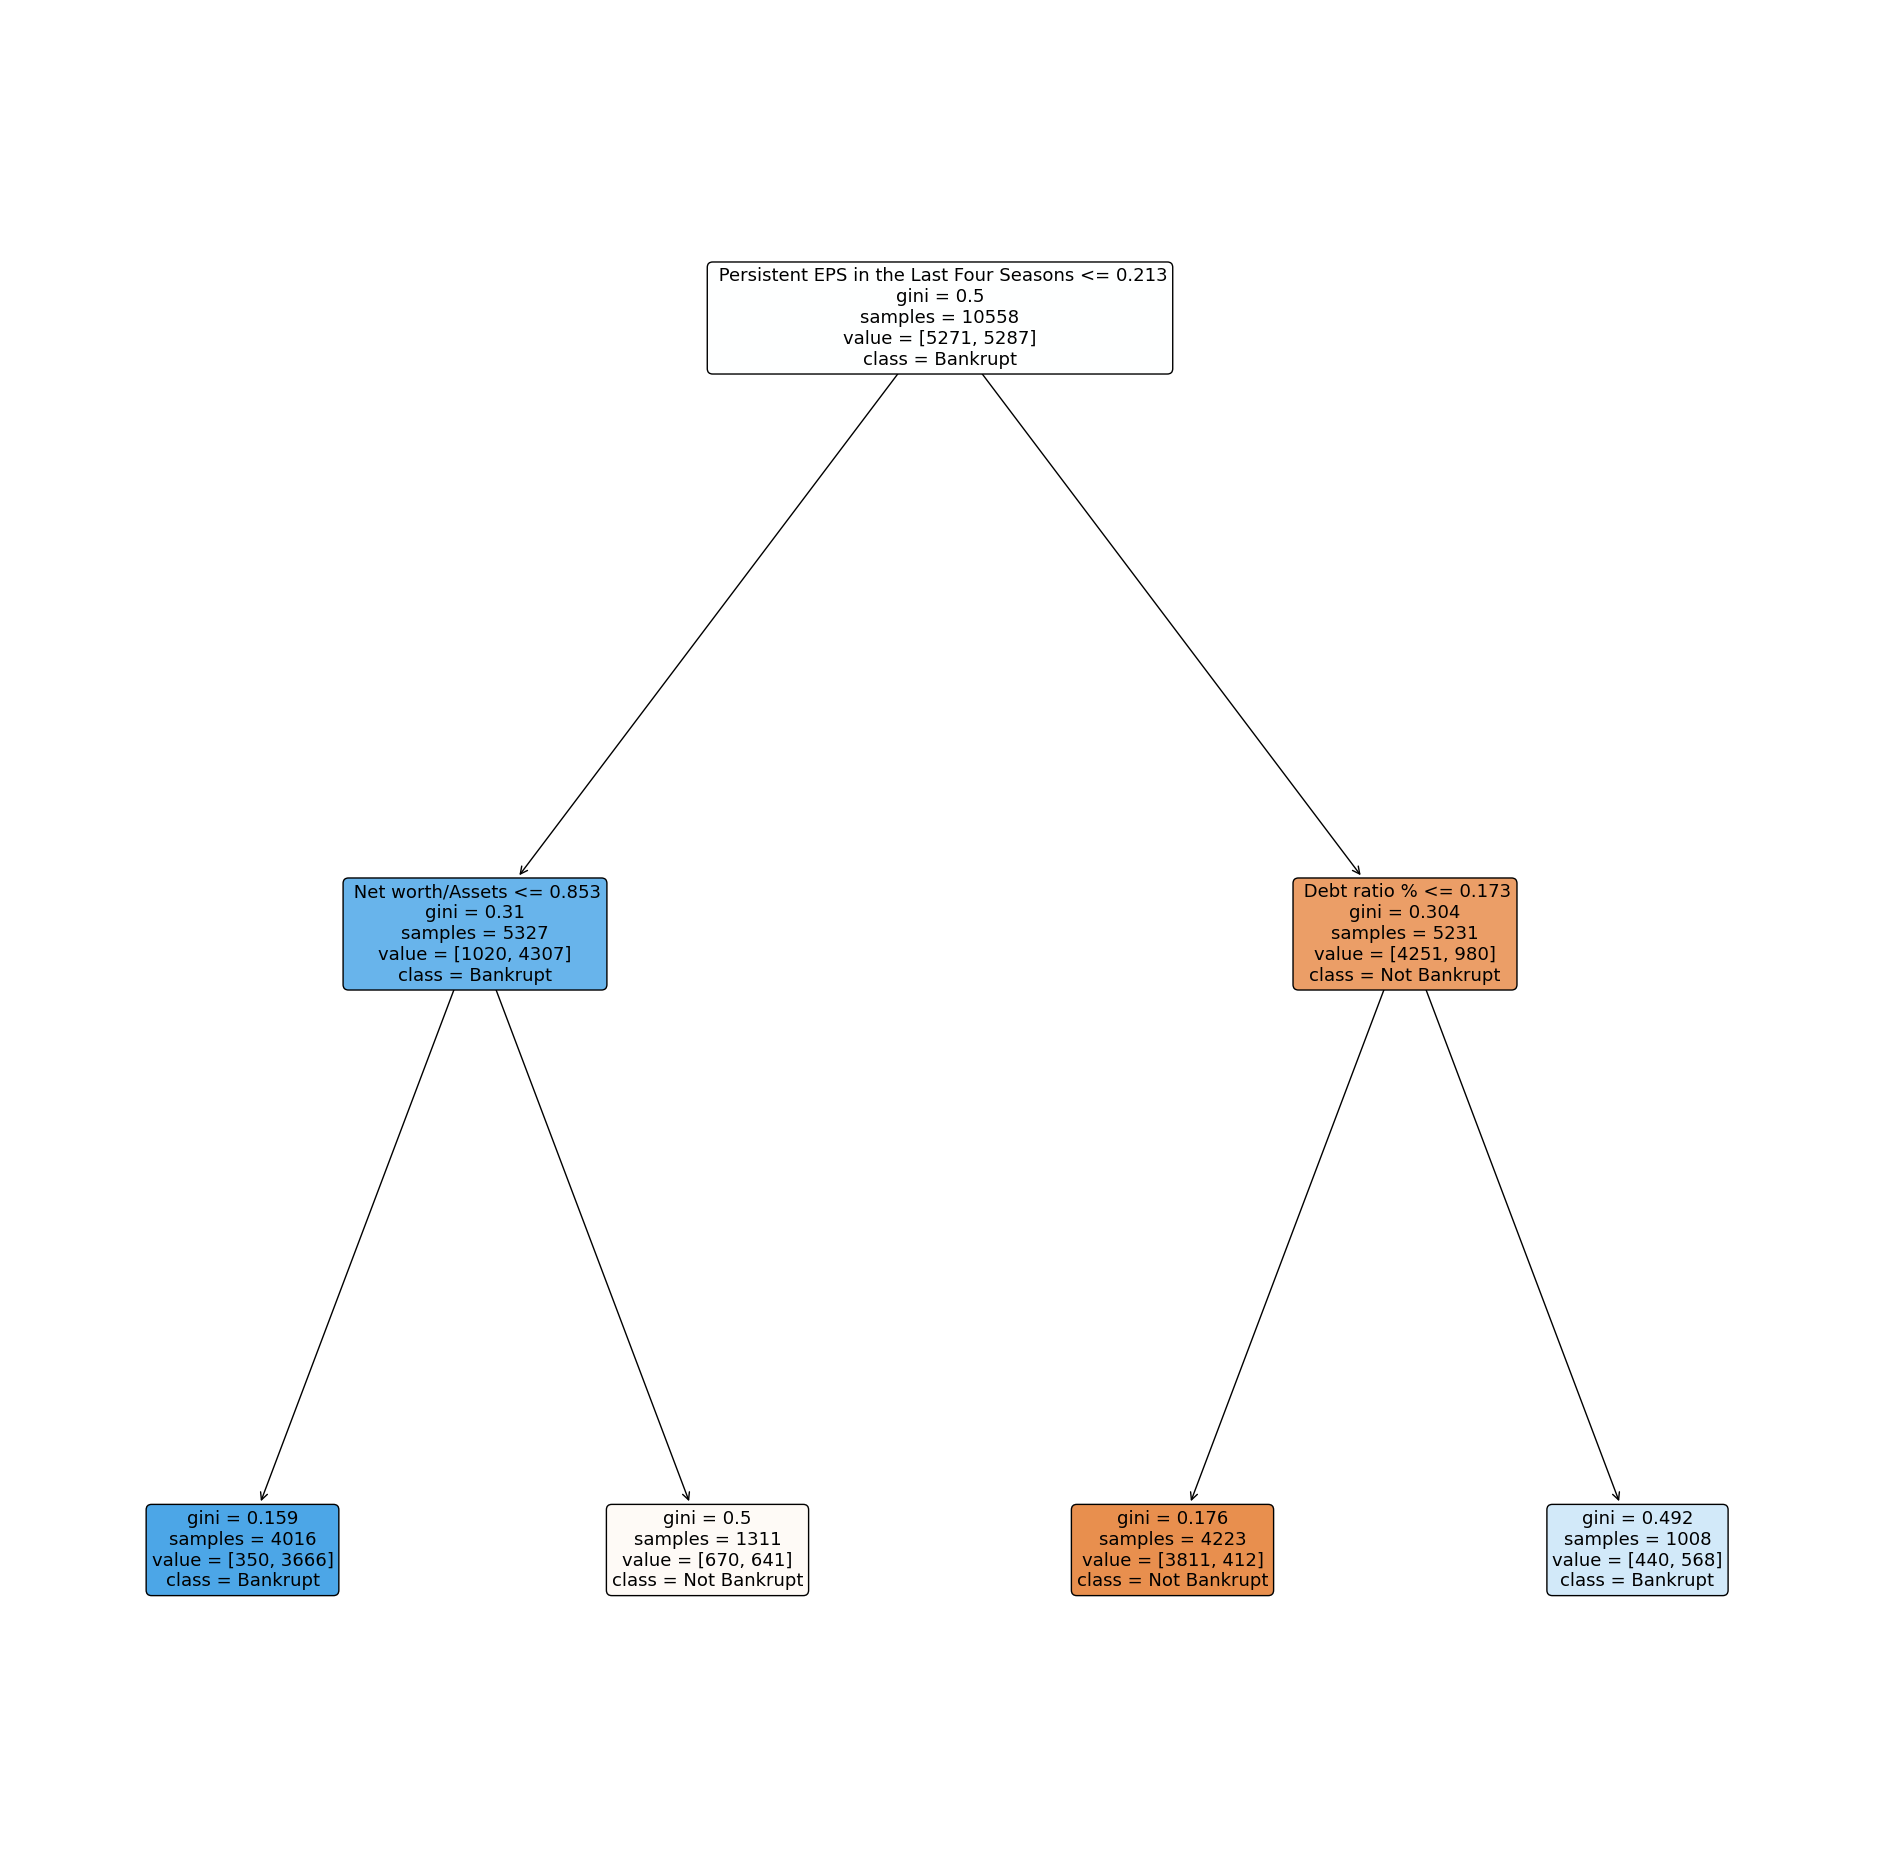

In [30]:
dectree_upsample_top10 = DecisionTreeClassifier(max_depth=2)
dectree_upsample_top10.fit(X_train_top10_upsample, y_train_top10_upsample)

f = plt.figure(figsize=(24,24))
plot_tree(dectree_upsample_top10, filled=True, rounded=True, 
          feature_names=X_top10_upsample.columns, 
          class_names=["Not Bankrupt","Bankrupt"])

### Seeing the accuracy of our Decision Tree Model

### The code below calculates th accuracy of our Decision Tree Model of depth 2 for all variables as well as the top 10 variables.

In [31]:
# Evaluate the accuracy of the model for all upsampled variables
y_pred_upsample = dectree_upsample.predict(X_test_upsample)

accuracy = accuracy_score(y_test_upsample, y_pred_upsample)
print("Accuracy of the model with all varaibles: {:.2f}%".format(accuracy*100))


# Evaluate the accuracy of the model for top 10 upsampled variables
y_pred_upsample_top10 = dectree_upsample_top10.predict(X_test_top10_upsample)

accuracy = accuracy_score(y_test_top10_upsample, y_pred_upsample_top10)
print("Accuracy of the model with top 10 variables: {:.2f}%".format(accuracy*100))


Accuracy of the model with all varaibles: 82.61%
Accuracy of the model with top 10 variables: 82.80%


### Calculating multiple accuracy values for our two decision tree models from a range of depth = 1 to depth = 10

In [32]:
# For top 95 upsampled
for i in range(1,10):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_upsample, y_train_upsample)
    y_pred_upsample = dectree.predict(X_test_upsample)
    accuracy = accuracy_score(y_test_upsample, y_pred_upsample)
    print(f"Accuracy of the model for all variables for tree of depth {i}: {accuracy*100:.2f}%")
print("----------")


# For top 10 upsampled
for i in range(1,10):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_top10_upsample, y_train_top10_upsample)
    y_pred_upsample_top10 = dectree.predict(X_test_top10_upsample)
    accuracy_top10 = accuracy_score(y_test_top10_upsample, y_pred_upsample_top10)
    print(f"Accuracy of the model for top 10 variables for tree of depth {i}: {accuracy_top10*100:.2f}%")
print("----------")


Accuracy of the model for all variables for tree of depth 1: 80.80%
Accuracy of the model for all variables for tree of depth 2: 82.61%
Accuracy of the model for all variables for tree of depth 3: 89.24%
Accuracy of the model for all variables for tree of depth 4: 92.39%
Accuracy of the model for all variables for tree of depth 5: 94.43%
Accuracy of the model for all variables for tree of depth 6: 95.72%
Accuracy of the model for all variables for tree of depth 7: 96.06%
Accuracy of the model for all variables for tree of depth 8: 96.44%
Accuracy of the model for all variables for tree of depth 9: 96.86%
----------
Accuracy of the model for top 10 variables for tree of depth 1: 80.83%
Accuracy of the model for top 10 variables for tree of depth 2: 82.80%
Accuracy of the model for top 10 variables for tree of depth 3: 87.73%
Accuracy of the model for top 10 variables for tree of depth 4: 88.18%
Accuracy of the model for top 10 variables for tree of depth 5: 90.76%
Accuracy of the model 

### We then plot a graph to visualise how the accuracy changes as the depth increases

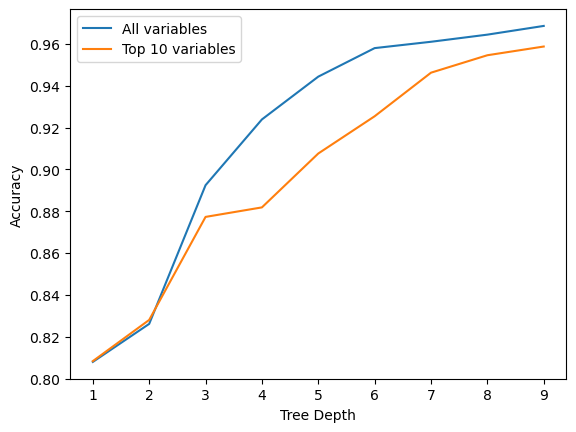

In [33]:

depths = range(1, 10)
accuracies = []
accuracies_top10 = []

# For top 95 upsampled
for i in depths:
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_upsample, y_train_upsample)
    y_pred_upsample = dectree.predict(X_test_upsample)
    accuracy = accuracy_score(y_test_upsample, y_pred_upsample)
    accuracies.append(accuracy)

# For top 10 upsampled
for i in depths:
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_top10_upsample, y_train_top10_upsample)
    y_pred_upsample_top10 = dectree.predict(X_test_top10_upsample)
    accuracy_top10 = accuracy_score(y_test_top10_upsample, y_pred_upsample_top10)
    accuracies_top10.append(accuracy_top10)

# Plot the accuracy versus depth for both models
plt.plot(depths, accuracies, label='All variables')
plt.plot(depths, accuracies_top10, label='Top 10 variables')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### We then prune the trees from the max depth of 10 to determine at which point does overfitting occur. Pruning the tree allows us to determine the level at which accuracy of the model is maximised without overfitting the data

In [34]:
# Split the data into training and validation sets for all variables
X_train, X_val, y_train, y_val = train_test_split(X_train_upsample, y_train_upsample, test_size=0.2, random_state=42)

# Train the decision tree with a high value of max_depth
dectree = DecisionTreeClassifier(max_depth=10)
dectree.fit(X_train, y_train)

# Evaluate the performance of the decision tree on the validation set
y_pred_val = dectree.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of the model on the validation set: {accuracy_val*100:.2f}%")

# Reduce the depth of the tree until the performance on the validation set starts to decrease
while True:
    depth = dectree.get_depth()
    if depth == 1:
        break
    dectree = DecisionTreeClassifier(max_depth=depth-1)
    dectree.fit(X_train, y_train)
    y_pred_val = dectree.predict(X_val)
    accuracy_val_new = accuracy_score(y_val, y_pred_val)
    if accuracy_val_new < accuracy_val:
        break
    accuracy_val = accuracy_val_new

# The depth of the pruned decision tree
optimal_depth_all = dectree.get_depth()
print(f"Optimal depth of the pruned tree for all variables: {optimal_depth_all}")

Accuracy of the model on the validation set: 97.63%
Optimal depth of the pruned tree for all variables: 9


In [35]:
# Split the data into training and validation sets for top 10 variables
X_train, X_val, y_train, y_val = train_test_split(X_train_top10_upsample, y_train_top10_upsample, test_size=0.2, random_state=42)

# Train the decision tree with a high value of max_depth
dectree = DecisionTreeClassifier(max_depth=10)
dectree.fit(X_train, y_train)

# Evaluate the performance of the decision tree on the validation set
y_pred_val = dectree.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of the model on the validation set: {accuracy_val*100:.2f}%")

# Reduce the depth of the tree until the performance on the validation set starts to decrease
while True:
    depth = dectree.get_depth()
    if depth == 1:
        break
    dectree = DecisionTreeClassifier(max_depth=depth-1)
    dectree.fit(X_train, y_train)
    y_pred_val = dectree.predict(X_val)
    accuracy_val_new = accuracy_score(y_val, y_pred_val)
    if accuracy_val_new < accuracy_val:
        break
    accuracy_val = accuracy_val_new

# The depth of the pruned decision tree
optimal_depth_top10 = dectree.get_depth()
print(f"Optimal depth of the pruned tree for top 10 variables: {optimal_depth_top10}")

Accuracy of the model on the validation set: 96.83%
Optimal depth of the pruned tree for top 10 variables: 9


### This code block below plots the AUC and its associated classification report for the Decision Tree model on all variables.

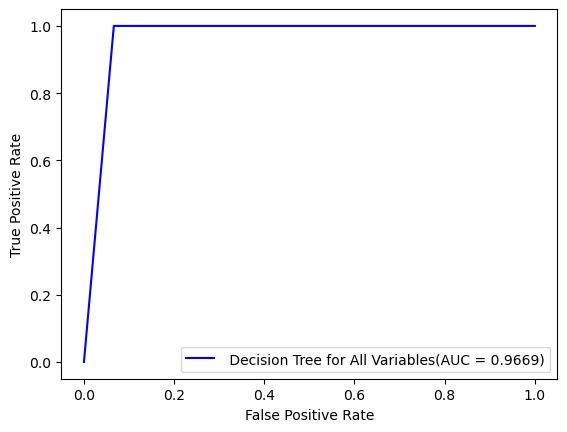

              precision    recall  f1-score   support

           0     1.0000    0.9337    0.9657      1328
           1     0.9371    1.0000    0.9676      1312

    accuracy                         0.9667      2640
   macro avg     0.9686    0.9669    0.9666      2640
weighted avg     0.9688    0.9667    0.9666      2640



In [36]:

# create decision tree model and fit to training data for all variables

dt_model = DecisionTreeClassifier(max_depth=optimal_depth_all)
dt_model.fit(X_train_upsample, y_train_upsample)
# predict probabilities with decision tree model
dt_probs = dt_model.predict(X_test_upsample)


fpr_dt, tpr_dt, _ = roc_curve(y_test_upsample, dt_probs)

roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.plot(fpr_dt, tpr_dt, color='blue', label=' Decision Tree for All Variables(AUC = %0.4f)' % roc_auc_dt)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Generate the classification report
print(classification_report(y_test_upsample, dt_probs, digits = 4))


### This code block below plots the AUC and its associated classification report for the decision tree model on the top 10 variables.

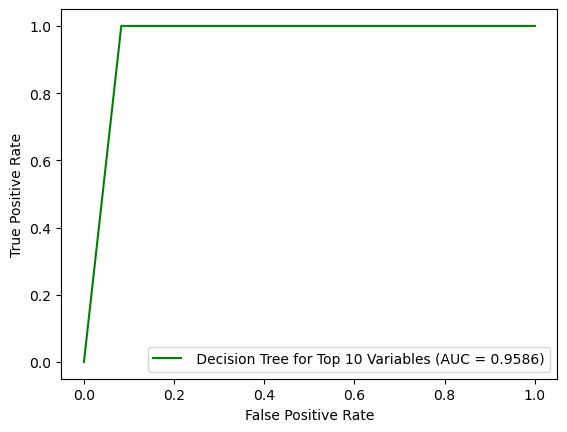

              precision    recall  f1-score   support

           0     1.0000    0.9172    0.9568      1328
           1     0.9226    1.0000    0.9598      1312

    accuracy                         0.9583      2640
   macro avg     0.9613    0.9586    0.9583      2640
weighted avg     0.9616    0.9583    0.9583      2640



In [37]:

# create decision tree model and fit to training data for top 10 variables

dt_model_top10 = DecisionTreeClassifier(max_depth=optimal_depth_top10)
dt_model_top10.fit(X_train_top10_upsample, y_train_top10_upsample)
# predict probabilities with decision tree model
dt_probs_top10 = dt_model_top10.predict(X_test_top10_upsample)

fpr_dt_top10, tpr_dt_top10, _ = roc_curve(y_test_top10_upsample, dt_probs_top10)

roc_auc_dt_top10 = auc(fpr_dt_top10, tpr_dt_top10)

plt.plot(fpr_dt_top10, tpr_dt_top10, color='green', label=' Decision Tree for Top 10 Variables (AUC = %0.4f)' % roc_auc_dt_top10)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Generate the classification report
print(classification_report(y_test_top10_upsample, dt_probs_top10, digits = 4))

